In [1]:
import numpy as np
import os
import skimage.io as skio
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
filtered_patches_path = os.path.join(indir, "filtered_patches")

In [2]:
# read all of the .npy arrays in the folder into a single array
filtered_patches = []

for file in os.listdir(filtered_patches_path):
    if file.endswith(".npy"):
        filtered_patches.append(np.load(os.path.join(filtered_patches_path, file)))

Importing arrays: 100%|██████████| 12500/12500 [22:25<00:00,  9.29array/s]


Total imported arrays: 12500
Final filtered_patches shape: (12500, 256, 256, 3)


In [3]:
filtered_patches.shape

C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with the desired augmentations
datagen = ImageDataGenerator(
    horizontal_flip=True,         # Enables horizontal flip
    vertical_flip=True,           # Enables vertical flip
    brightness_range=(0.5, 1.5)   # Adjusts brightness within the given range (0.5-1.5 times the original brightness)
)

# Fit the ImageDataGenerator on your data
datagen.fit(filtered_patches)

Generating augmented data: 100%|█████████▉| 12499/12500 [00:11<00:00, 1111.65sample/s]


Filtered array shape: (12500, 256, 256, 3)
Augmented array shape: (12500, 256, 256, 3)
Combined array shape: (25000, 256, 256, 3)


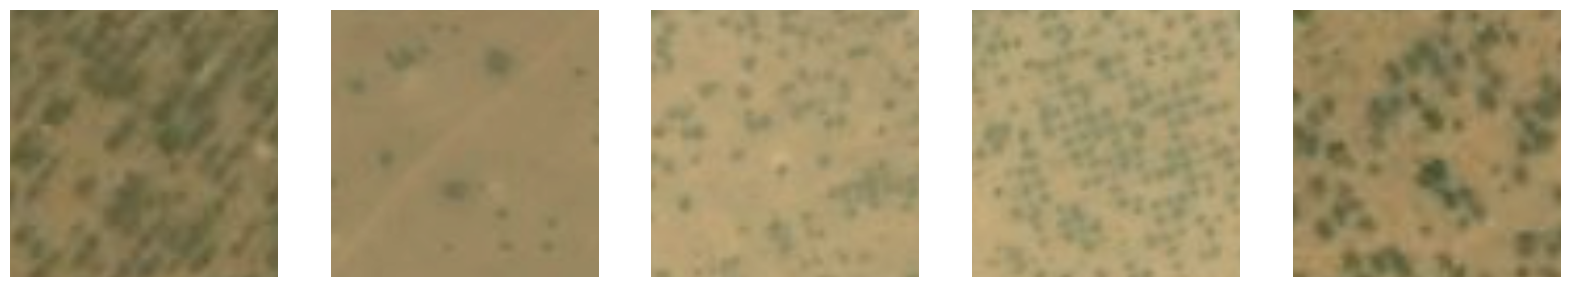

In [5]:
num_samples = filtered_patches.shape[0]

# Initialize an empty array to store the augmented images
augmented_patches = np.empty_like(filtered_patches)

# Generate the augmented data and store it in the augmented_patches array
for i, batch in enumerate(datagen.flow(filtered_patches, batch_size=1, shuffle=False)):
    augmented_patches[i] = batch[0]

    # Stop the loop once all samples have been generated
    if i + 1 == num_samples:
        break

# Combine the original and augmented datasets
combined_patches = np.concatenate((filtered_patches, augmented_patches), axis=0)

print("Filtered array shape:", filtered_patches.shape)
print("Augmented array shape:", augmented_patches.shape)
print("Combined array shape:", combined_patches.shape)

In [6]:
# print 5 random patches along with their indices
for i in range(5):
    index = np.random.randint(0, len(filtered_patches))
    print(f"Index: {index}")
    plt.imshow(filtered_patches[index])
    plt.show()